# Introduction

A challenge which the banking industry faces on a day-to-day basis is to assess credit risks of applicants while looking at their loan applications. Applicants who are likely to repay loan are termed as good credit risks. Whereas applicants who are not likely to repay their loan amounts are termed as bad credit risks. Therefore, it is vital for banking business to minimize risk by carefully identifying "bad credit risks" so that the liabilities of the applicants are not transfered to banks. 

Artificial intelligence (AI) techniques can drive banking operations to correctly identify bad credit risks. In this notebook, we will use a German credit dataset to build AI models and evaluate their potential to help banking industry. We frame this problem as a supervised classification task with two outcomes: good and bad credit risks. 

# Explore the German credit data (Statlog)

This notebook analyzes credit dataset of Germany (Statlog) to identify good or bad credit risk. The dataset is downloaded from UCI Machine learning repository (https://archive-beta.ics.uci.edu/ml/datasets/144).

In this notebook, we use the German dataset that includes 20 attributes and 1 target. 

1.   **Checking account status:** Status of checking account coded as a categorical variable

           A11 :      ... <    0 DM (Little)
	       A12 : 0 <= ... <  200 DM (Moderate)
	       A13 :      ... >= 200 DM / salary assignments for at least 1 year (Rich)
           A14 : no checking account (None)

2.   **Duration in month:** Coded as a numerical variable

3. **Credit history:** Coded as a categorical variable
      
          A30 : no credits taken/all credits paid back duly (None)
          A31 : all credits at this bank paid back duly (Good here)
	      A32 : existing credits paid back duly till now (Good elsewhere)
          A33 : delay in paying off in the past (Bad)
	      A34 : critical account/other credits existing (not at this bank) (Critical)

4. **Purpose for credit:** Coded as a categorical variable

          A40 : car (new) (New car)
	      A41 : car (used) (Old car)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

5. **Credit amount:** Credit amount requested which is coded as a numerical variable

6. **Savings account/bonds:** Health of the savings account coded as a categorical variable

          A61 :          ... <  100 DM (Little)
	      A62 :   100 <= ... <  500 DM (Moderate)
	      A63 :   500 <= ... < 1000 DM (Rich)
	      A64 :          .. >= 1000 DM (Very rich)
          A65 :   unknown/ no savings account (None)

7. **Present employment since:** Number of years working in the present employemnt coded as a categorical variable

          A71 : unemployed
	      A72 :       ... < 1 year ()
	      A73 : 1  <= ... < 4 years () 
	      A74 : 4  <= ... < 7 years ()
	      A75 :       .. >= 7 years ()

8. **Installment rate in percentage of disposable income:** Rate of installment coded as a numerical variable

9. **Personal status and sex:** Background of an applicant coded as a categorical variable

        A91 : male   : divorced/separated (divorced-male)
	    A92 : female : divorced/separated/married (divorced-female)
        A93 : male   : single (single-male)
	    A94 : male   : married/widowed ()
	    A95 : female : single

10. **Other debtors / guarantors:** Availability of other guarantors coded as a categorical variable

        A101 : none
	    A102 : co-applicant
	    A103 : guarantor

11. **Present residence since:** A numerical variable captures the number of years an applicant is residing at his current residence

12. **Property:** Property owned by an applicant

        A121 : real estate
	    A122 : if not A121 : building society savings agreement/life insurance
        A123 : if not A121/A122 : car or other, not in attribute 6
	    A124 : unknown / no property

13. **Age in years:** Coded as a numerical variable

14. **Other installment plans:** Details of other installment plans coded as a categorical variable

        A141 : bank
	    A142 : stores
	    A143 : none

15. **Housing:** Housing type coded as a categorical variable

        A151 : rent
	    A152 : own
	    A153 : for free

16. **Number of existing credits at this bank:** any other credits at this bank coded as a numerical variable

17. **Job:** Type of job being done by an applicant coded as a categorical variable

        A171 : unemployed/ unskilled  - non-resident
	    A172 : unskilled - resident
	    A173 : skilled employee / official
	    A174 : management/ self-employed/ highly qualified employee/ officer

18. **Number of people being liable to provide maintenance for:** Coded as a numeral

19. **Telephone:** Telephonic details coded as a categorical variable

        A191 : none
	    A192 : yes, registered under the customers name

20. **Foreign worker:** Working status of an applicant coded as a categorical variable

        A201 : yes
	    A202 : no

21. **Target:** Binary where 1 refers to *good credit* and 2 refers to *bad credit* risk.









## **Load dataset**

Let's start by loading the german credit data as a Pandas DataFrame and viewing the first few rows.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('german_credit_data.csv', sep = ' ', header= None)
#rename columns
df.columns = ['ChkAccountStatus', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmt','SavingsAcc',
              'Employment','InstallmentRate','PersonalStatus','Guarantors','Residence','Property',
              'Age', 'InstallmentPlans','Housing','ExistingCredits','Job','PeopleforLiability',
              'Telephone','ForeignWorker','Target']

#rename unique values of categorical columns
df['ForeignWorker'].replace(to_replace=sorted(df['ForeignWorker'].unique()),
           value= ['Migrant', 'Not a migrant'],
           inplace=True)
df['ChkAccountStatus'].replace(to_replace=sorted(df['ChkAccountStatus'].unique()),
           value= ['Little', 'Moderate', 'Rich', 'None'],
           inplace=True)
df['CreditHistory'].replace(to_replace=sorted(df['CreditHistory'].unique()),
           value= [ 'None', 'Good here','Good elsewhere', 'Bad', 'Critical'],
           inplace=True)
df['Purpose'].replace(to_replace=sorted(df['Purpose'].unique()),
           value= ['New car', 'Old car', 'Others', 'Furniture', 'Radio/TV',
                  'Home appliances','Repairs', 'Education',
                  'Retraining', 'Business'],
           inplace=True)
df['SavingsAcc'].replace(to_replace=sorted(df['SavingsAcc'].unique()),
           value= ['Little', 'Moderate', 'Rich', 'Very rich', 'None'],
           inplace=True)
df['Employment'].replace(to_replace=sorted(df['Employment'].unique()),
           value= ['Unemployed', '<1 year', '1-4 years', '4-7 years', '>7 years'],
           inplace=True)
df['PersonalStatus'].replace(to_replace=sorted(df['PersonalStatus'].unique()),
           value= ['Divorced-M', 'Divorced-F', 'Single-M', 'Married-M'],
           inplace=True)
df['Guarantors'].replace(to_replace=sorted(df['Guarantors'].unique()),
           value= ['None', 'Co-applicant', 'Guarrantor'],
           inplace=True)
df['InstallmentPlans'].replace(to_replace=sorted(df['InstallmentPlans'].unique()),
           value= ['Bank', 'Stores', 'None'],
           inplace=True)
df['Housing'].replace(to_replace=sorted(df['Housing'].unique()),
           value= ['Rent', 'Own', 'Free'],
           inplace=True)
df['Job'].replace(to_replace=sorted(df['Job'].unique()),
           value= ['Unskilled-non res', 'Unskilled-res', 'Skilled', 'Highly skilled'],
           inplace=True)
df['Telephone'].replace(to_replace=sorted(df['Telephone'].unique()),
           value= ['None', 'Yes'],
           inplace=True)
df['Property'].replace(to_replace=sorted(df['Property'].unique()),
           value= ['Real estate', 'Building agg', 'Car', 'None'],
           inplace=True)

Visualize first 10 rows of the dataset

In [2]:
df.head(10)

,ChkAccountStatus,Duration,CreditHistory,Purpose,CreditAmt,SavingsAcc,Employment,InstallmentRate,PersonalStatus,Guarantors,...,Property,Age,InstallmentPlans,Housing,ExistingCredits,Job,PeopleforLiability,Telephone,ForeignWorker,Target
0,Little,6,Critical,Radio/TV,1169,None,>7 years,4,Single-M,None,...,Real estate,67,None,Own,2,Skilled,1,Yes,Migrant,1
1,Moderate,48,Good elsewhere,Radio/TV,5951,Little,1-4 years,2,Divorced-F,None,...,Real estate,22,None,Own,1,Skilled,1,None,Migrant,2
2,None,12,Critical,Education,2096,Little,4-7 years,2,Single-M,None,...,Real estate,49,None,Own,1,Unskilled-res,2,None,Migrant,1
3,Little,42,Good elsewhere,Furniture,7882,Little,4-7 years,2,Single-M,Guarrantor,...,Building agg,45,None,Free,1,Skilled,2,None,Migrant,1
4,Little,24,Bad,New car,4870,Little,1-4 years,3,Single-M,None,...,None,53,None,Free,2,Skilled,2,None,Migrant,2
5,None,36,Good elsewhere,Education,9055,None,1-4 years,2,Single-M,None,...,None,35,None,Free,1,Unskilled-res,2,Yes,Migrant,1
6,None,24,Good elsewhere,Furniture,2835,Rich,>7 years,3,Single-M,None,...,Building agg,53,None,Own,1,Skilled,1,None,Migrant,1
7,Moderate,36,Good elsewhere,Old car,6948,Little,1-4 years,2,Single-M,None,...,Car,35,None,Rent,1,Highly skilled,1,Yes,Migrant,1
8,None,12,Good elsewhere,Radio/TV,3059,Very rich,4-7 years,2,Divorced-M,None,...,Real estate,61,None,Own,1,Unskilled-res,1,None,Migrant,1
9,Moderate,30,Critical,New car,5234,Little,Unemployed,4,Married-M,None,...,Car,28,None,Own,2,Highly skilled,1,None,Migrant,2


Now that we know what the features and labels in the data represent, let's explore the dataset. First, let's see if there are any missing (null) values.

In [3]:
df.isnull().sum()

ChkAccountStatus      0
Duration              0
CreditHistory         0
Purpose               0
CreditAmt             0
SavingsAcc            0
Employment            0
InstallmentRate       0
PersonalStatus        0
Guarantors            0
Residence             0
Property              0
Age                   0
InstallmentPlans      0
Housing               0
ExistingCredits       0
Job                   0
PeopleforLiability    0
Telephone             0
ForeignWorker         0
Target                0
dtype: int64

We then check for any duplicate rows in the dataset.

In [4]:
df.duplicated().sum()

0

The dataset is complete as there are no missing values and no duplicate rows!

## Class distribution

We change the original target labels. Now label '1' refers to good credit risk and label '0' refers to bad credit risk.

In [5]:
df['Target'] = df['Target'].map({1: 1, 2: 0})

In [6]:
df['Target'].value_counts()

1    700
0    300
Name: Target, dtype: int64

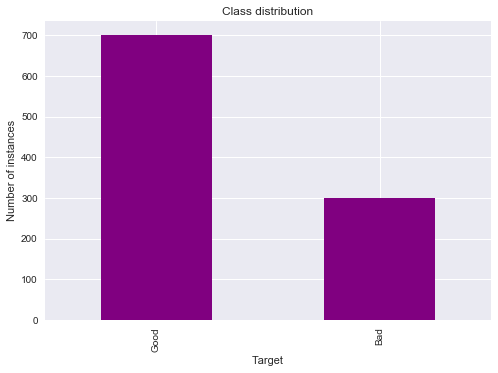

In [7]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
ax = df['Target'].value_counts().plot(kind='bar', color='purple')
ax.set_xlabel('Target')
ax.set_ylabel('Number of instances')
ax.set_xticklabels(['Good', 'Bad'])
plt.title('Class distribution');

In [8]:
#Identify class imbalance ratio
imb_ratio = len(df[df['Target'] == 1]) / len(df[df['Target'] == 0])
print('Imbalance ratio is:',"%.2f" % imb_ratio)

Imbalance ratio is: 2.33


## Data processing

Let's divide features into numerical and categorical features.

In [9]:
# Separate features and labels

numeric_features = df.describe().columns.tolist()

#Drop Target from numerical features

numeric_features.pop(-1)

print('Numerical features:',numeric_features)

#categorical columns 
categorical_features = list(set(df.columns.tolist()).difference(df.describe().columns.tolist()))

print('Categorical features:',categorical_features)

df[categorical_features] = df[categorical_features].astype('category')

#feature names
features = numeric_features + categorical_features

print('Total number of features or attributes:', len(features))

Numerical features: ['Duration', 'CreditAmt', 'InstallmentRate', 'Residence', 'Age', 'ExistingCredits', 'PeopleforLiability']
Categorical features: ['Job', 'Housing', 'ChkAccountStatus', 'SavingsAcc', 'Property', 'Employment', 'ForeignWorker', 'Purpose', 'PersonalStatus', 'InstallmentPlans', 'CreditHistory', 'Guarantors', 'Telephone']
Total number of features or attributes: 20


### Numerical features

Now let's compare the numerical feature distributions for each label value.

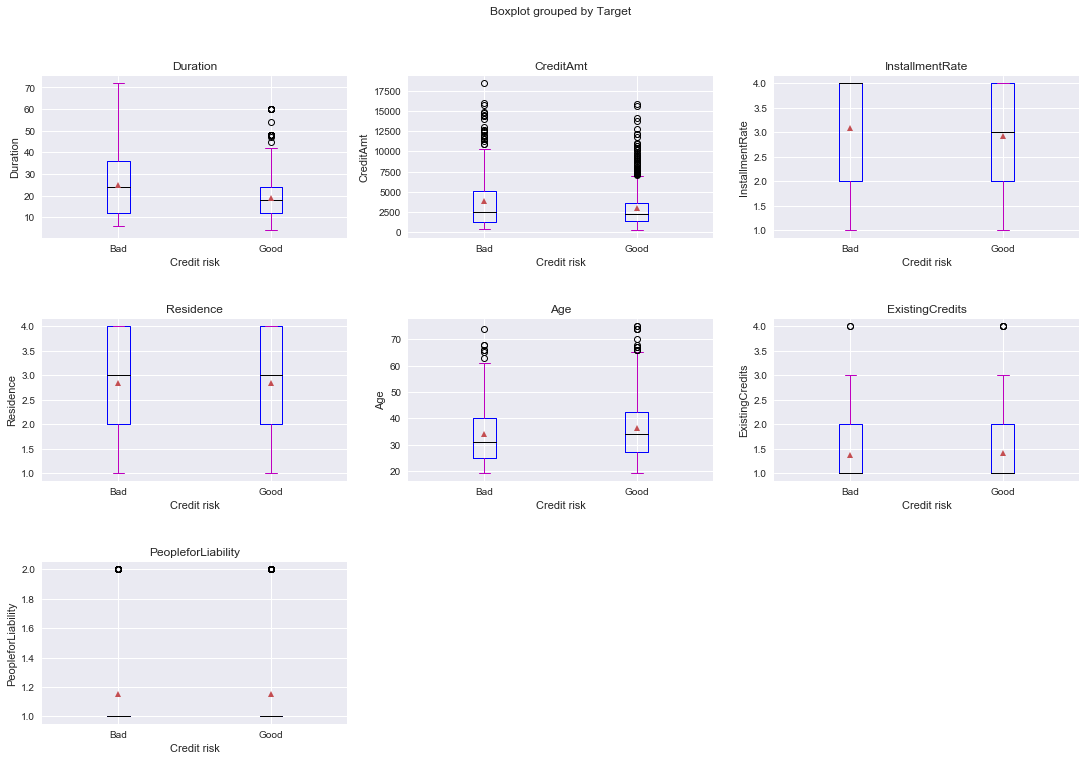

In [10]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
figure, axes = plt.subplots(3, 3, figsize=(18,12))
plt.subplots_adjust(hspace = 0.5, wspace=0.10)
figure.delaxes(axes[-1, -1])
figure.delaxes(axes[-1, -2])
i=0

for col in numeric_features:
    a = int(np.floor(i/3))
    b = i%3
    ax = df.boxplot(column=col, by='Target', ax=axes[a][b],
              color=dict(boxes='blue', whiskers='m', medians='k', caps='m'),
             showfliers=True, grid=True, rot=0, showmeans = True)
    ax.set_xlabel("Credit risk")
    ax.set_ylabel(col)
    ax.set_xticklabels(['Bad', 'Good'])
    i=i+1
    plt.title(col)
plt.show()

By looking at the box plots, we obsereve that "Duration", "Credit Amount", "Installment rate", and "Age" seem to be strong predictors!

1. **Longer duration** is related with larger risk. One possible explanation for this is the interest rate on the credit. At the end of the period, an applicant would have to pay an amount that includes credit amount and accumulated interest. 

2. **High credit amount** involves more risk since an applicant is more likely to repay lower sums. 

3. **High installment rate** seems to be associated with more risk since an applicant than would have low financial freedom to support his day-to-day life.

4. **Younger applicants** present more risk than older ones since the latter seem to have more financial security. 

### Clean outliers

Next, we use the Z-score based method to remove outliers from our dataset. Z-score can be computed as $Z = \frac{X- \mu}{\sigma}$. Here, $X$ refers to the data, $\mu$ refers to mean, and $\sigma$ refers to the standard deviation. A standard cut-off value for finding outliers are Z-scores of +/-3 or further from zero. 


In [11]:
from scipy import stats
df = df[(np.abs(stats.zscore(df[['Duration', 'CreditAmt', 'InstallmentRate', 'Residence', 'Age', 
                            'ExistingCredits', 'PeopleforLiability']])) < 3).all(axis=1)]

Next, we will check correlations.

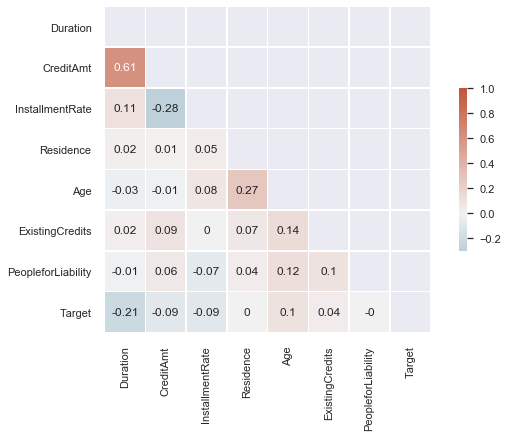

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr=df.corr(method ='pearson').round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.set(rc={'figure.figsize':(10,6)})

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-0.3, vmax=1.0, center=0, annot = True, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

By looking at the the correlations, we obsereve that "Duration", "Credit Amount", "Installment rate", "Existing Credits", and "Age" seem to be correlated with the target variable. We will drop "Residence" and "People for liability" since these two features do not add any significant value to the prediction of the target variable. 

In [13]:
numeric_features = ['Duration', 'Age', 'CreditAmt', 'InstallmentRate', 'ExistingCredits']
features = numeric_features + categorical_features
print('Updated number of features:', len(features))

Updated number of features: 18


### Categorical features

Let's analyze how categorical variables affect the credit rate.

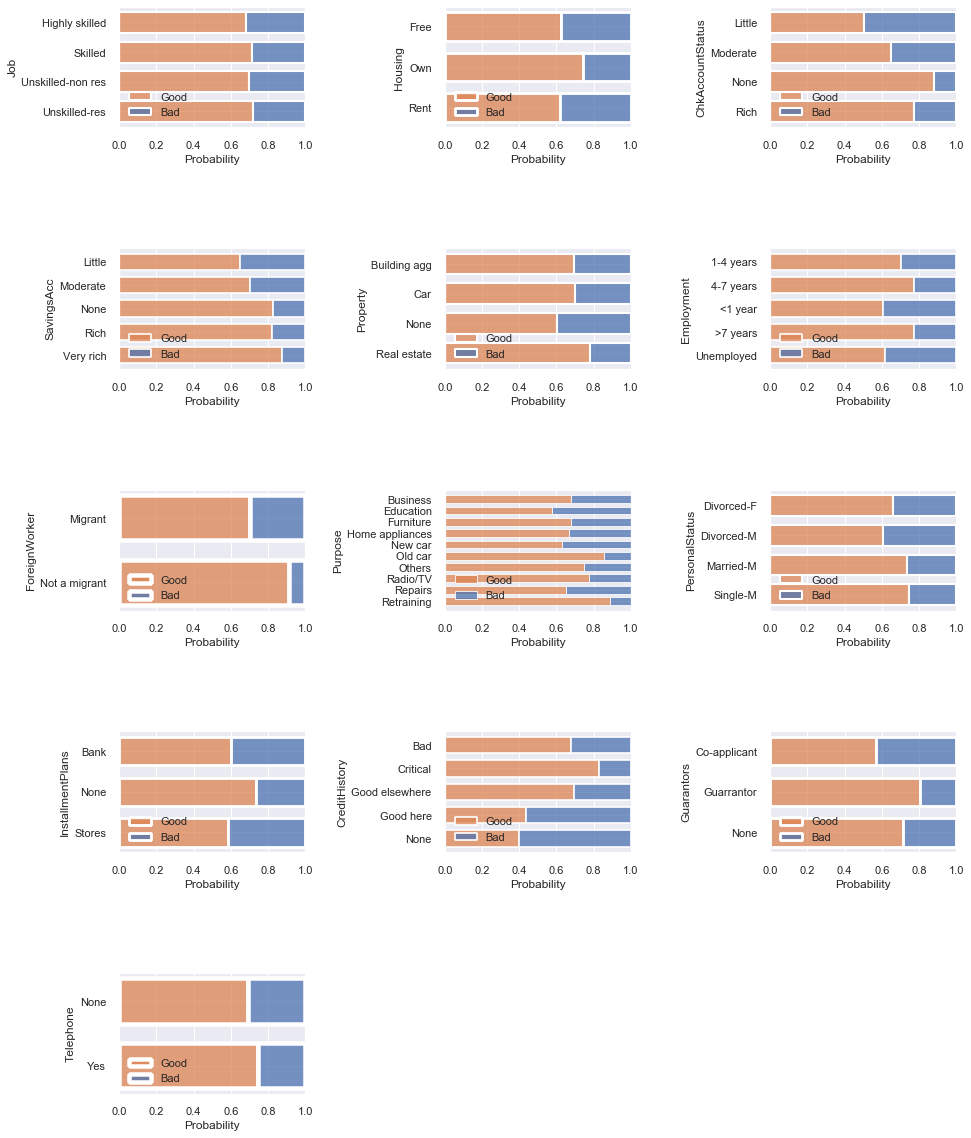

In [14]:
%matplotlib inline
figure, axes = plt.subplots(5, 3, figsize=(15,20))
plt.subplots_adjust(hspace = 1.0, wspace=0.75)
figure.delaxes(axes[-1, -1])
figure.delaxes(axes[-1, -2])
i=0

for col in categorical_features:
    a = int(np.floor(i/3))
    b = i%3
    sns.histplot(ax = axes[a][b], data = df, y = col , hue = 'Target', stat="probability", 
                 multiple = 'fill', shrink=0.7)
    axes[a][b].legend(['Good', 'Bad'], loc='lower left')
    i = i+1
plt.show()

We observe the following insights by looking at the above plots.

1. Applicants who maintain a healthy savings account are more likely to repay their credits. 
2. Applicant who own a property (car, real estate) are more likely to reapy than who owns nothing.
3. Applicants who have a guarrantor are more likely to repay their credits.
4. Married/single males are more likely to pay back than divorced males and females.
5. Applicant with a good credit history present low risk.
6. Applicants who own a house are more likely to repay since it shows their good financial health. 
7. Applicant who have healthy checking account are more likely to repay. 
8. Migrant are more likely to present risks than non-migrant workers.
9. Applicant who have a telephone are more likely to repay since they seem to have good financial health.
10. Applicants with more number of experiences might have good financial security; therefore, they are more likely to repay credits.
11. Applicant who take credit for education, new car, and repairs seem to present more risk.

In [15]:
print('Updated number of features:', len(features))

Updated number of features: 18


# Experiments

## Split the dataset

First, we define features and labels before classifiers are trained. Then, the dataset is split into two: training (80%) and testing (20%). We use the training dataset for model selection and the testing dataset for assessing model performance on an unseen dataset.

In [16]:
from sklearn.model_selection import train_test_split

# Separate features and labels
label = 'Target'
X, y = df[features], df[label]

# a dataframe for testing model fairness
A = df[['ChkAccountStatus', 'Purpose', 'Guarantors', 'InstallmentPlans', 
       'SavingsAcc', 'ForeignWorker', 'CreditHistory', 'Housing', 'PersonalStatus']]

# Split that dataset
X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(
    X, y, A, test_size=0.20, random_state=42, stratify=y)

print('Size of the training dataset:', X_train.shape[0])
print('Size of the testing dataset:', X_test.shape[0])

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
A_train = A_train.reset_index(drop=True)
A_test = A_test.reset_index(drop=True)

Size of the training dataset: 761
Size of the testing dataset: 191


Now we use cross-validatin technique to compare the performance of several classifiers. In this notebook, we have considered the following 8 classifiers.

1. Logistic regression (LR),
2. Random forest (RF),
3. Weighted Logistic regression (LR-W),
4. Weighted random forest (RF-W),
5. Balanced random forest classifier (BRF),
6. Easy Ensemble Classifier (EEC),
7. RUSBoost Classifier (RBC), and
8. Balanced Bagging Classifier (BBC)

Apart from first two, rests of the classifiers can handle class imbalance.


We use a pipeline to perform the cross-validation. Our pipeline has several components.

1. One-hot encoding for categorical features
2. Standard scaler for numerical features
3. 10-fold validation

We look at balanced accuray and precision to evalaute the performance of classifiers. The balanced accuracy computes an arithmetic mean of class-specific accuracies. Whereas, the precision focuses on how good the classifier is in prediciting good credit risks.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, balanced_accuracy_score, plot_confusion_matrix, classification_report, f1_score
from imblearn.metrics import geometric_mean_score
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate

column_trans = ColumnTransformer(
    [('category', OneHotEncoder(), categorical_features),
     ('numerical', StandardScaler(), numeric_features)])

scoring = {'accuracy','balanced_accuracy','precision'}

models = []

models.append(('LR', LogisticRegression(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('LR_W', LogisticRegression(random_state=42,class_weight="balanced")))
models.append(('RF_W', RandomForestClassifier(random_state=42, class_weight = "balanced")))
models.append(('BRF', BalancedRandomForestClassifier(random_state=42)))
models.append(('EEC', EasyEnsembleClassifier(base_estimator=AdaBoostClassifier(random_state=42))))
models.append(('RBC', RUSBoostClassifier(random_state=42)))
models.append(('BBC', BalancedBaggingClassifier(random_state=42)))

results_acc = []
results_bal_acc = []
results_prec = []

names = []
print('Model', 'Accuracy', 'BalAcc', 'Precision')
for name, model in models:
    rf = Pipeline(steps=[('preprocessor', column_trans),
                      ('classifier', model)])
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_validate(rf, X_train, y_train, cv=kfold, scoring=scoring)
    results_bal_acc.append(cv_results['test_balanced_accuracy'])
    results_acc.append(cv_results['test_accuracy'])
    results_prec.append(cv_results['test_precision'])
    names.append(name)
    msg = "%s %.4f %.4f %.4f" % (name, cv_results['test_accuracy'].mean(), 
                                  cv_results['test_balanced_accuracy'].mean(), 
                                  cv_results['test_precision'].mean())
    print(msg)

Model Accuracy BalAcc Precision
LR 0.7424 0.6489 0.7895
RF 0.7543 0.6262 0.7718
LR_W 0.7293 0.7286 0.8696
RF_W 0.7464 0.6234 0.7713
BRF 0.6858 0.7062 0.8680
EEC 0.6924 0.7081 0.8694
RBC 0.6977 0.6875 0.8432
BBC 0.6582 0.6571 0.8230


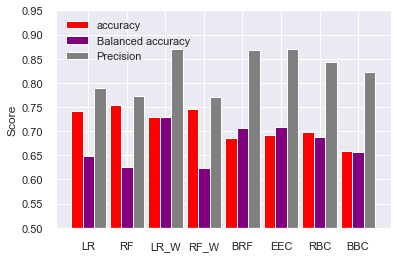

In [18]:
x = np.arange(len(names))
y1 = np.mean(results_acc, axis=1)
y2 = np.mean(results_bal_acc, axis=1)
y3 = np.mean(results_prec, axis=1)
width = 0.30
  
# plot data in grouped manner of bar type
plt.bar(x-0.3, y1, width, color='red', label='accuracy')
plt.bar(x, y2, width, color='purple', label='Balanced accuracy')
plt.bar(x+0.3, y3, width, color='grey', label='Precision')
plt.xticks([r for r in range(len(names))],names)
plt.ylabel('Score')
plt.legend(loc='upper left');
plt.ylim([0.5,0.95]);

This dataset suffers from class imbalance. Therfore, we observe that accuracy can be a misleading metric. Therefore, we use balanced accuracy in this case that tries to incoporate the class-specific accuracies in a single formula. 

Precision is considered here to evalaute the quality of models so that *bad credit risks* are not transfered as *good ones*. Higher the precision value, higher will be the chances of missclassifying a bad credit risk.

Our results suggest that the weighted logistic regression achieves a balanced accuracy of 72.86% and a precision of 86.96%. A comparable performance is achieved by the Easy Ensemble Classifier which shows a balanced accuracy of 70.81% and a precision of 86.94%.

We will use these two models and compare their performances on the test dataset.

# Results

## Classification performance

Now, we test the performance of both the weighted logistic regression and the Balanced Random Forest Classifier on an unseeen dataset. 

In [19]:
column_trans = ColumnTransformer(
    [('category', OneHotEncoder(), categorical_features),
     ('numerical', StandardScaler(), numeric_features)])

scoring = {'accuracy','balanced_accuracy','precision'}

models = []

models.append(('LR_W', LogisticRegression(random_state=42,class_weight="balanced")))
models.append(('EEC', EasyEnsembleClassifier(base_estimator=AdaBoostClassifier(random_state=42))))

results_acc = []
results_bal_acc = []
results_prec = []

names = []
print('Model', 'Accuracy', 'BalAcc', 'Precision')
for name, model in models:
    rf = Pipeline(steps=[('preprocessor', column_trans),
                      ('classifier', model)])
    clf = rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    msg = "%s %.4f %.4f %.4f " % (name, accuracy_score(y_test, pred), balanced_accuracy_score(y_test, pred), precision_score(y_test, pred))
    print(msg)

Model Accuracy BalAcc Precision
LR_W 0.7173 0.7257 0.8727 
EEC 0.7277 0.7547 0.9038 


The Easy Ensemble Classifier delivers the best performance on the test dataset with a balanced accuracy of 75.47% and a precision of 90.38%. 

We can observe the performance of the Easy Ensemble Classifier by looking at the confusion matrix. We can obseve that the model does a fine job by not having a missclassifation rate for bad credit risk. Only 10 out of 55 are missclassified. Furthermore, only 10 instances are wrongly predicted as *good* out of total instances that are predicted *good*.

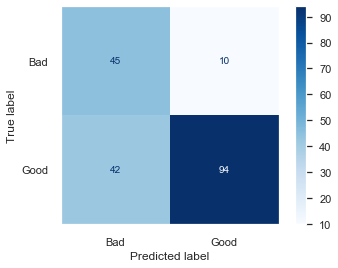

In [20]:
plot_confusion_matrix(clf, X_test, y_test,display_labels=['Bad', 'Good'],
                                 cmap=plt.cm.Blues) ;
plt.grid(False)

## Feature importance

Now we will look at the importance of features to predict the target variable. For this purpose, we will use permutation based feature importance.

In [21]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

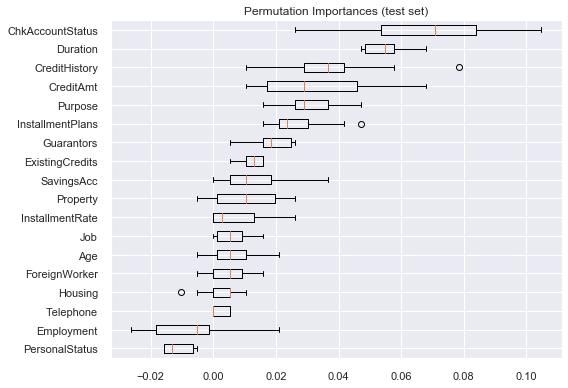

In [22]:
fig, ax = plt.subplots(figsize=(8,5.5))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

If we look at the above plot, we observe that the five most imortant features for classifying/predicting the credit risk rate turn out to be checkng account status, duration of credit, credit history, credit amount requested, purpose of credit, and installation plans. 

## Model fairness

Now we will use model fairness tool (fairlearn package) to investigate any disparity asosciated with the model. We will focus on the two most important categorical features: checking account status and purpose of credit. Besides, we also consider two other socio-economic characterstics such as migrant status and personal status. 

In [23]:
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate, count
from sklearn.metrics import fbeta_score, precision_score

### Checking account status

In [24]:
import functools
fbeta_06 = functools.partial(fbeta_score, beta=0.6)
metric_fns = {'selection_rate': selection_rate, 'fbeta_06': fbeta_06, 'precision_score': precision_score, 'count': count}

grouped_on_checking_account_status = MetricFrame(metrics=metric_fns,
                             y_true=y_test,
                             y_pred=pred,
                             sensitive_features=pd.Series(A_test['ChkAccountStatus']))

grouped_on_checking_account_status.by_group

,selection_rate,fbeta_06,precision_score,count
ChkAccountStatus,,,,
Little,0.291667,0.806569,0.928571,48
Moderate,0.382979,0.737127,0.888889,47
None,0.811765,0.899244,0.913043,85
Rich,0.272727,0.435897,0.666667,11


We observe that the model favors middle class people more than the others by looking at the selection rate. Here, selection rate is defined as the fraction of predicted labels matching the *good* outcome. *None* category stands out since count field shows that the dataset has most of the instances for this field. It seems other features are mostly useful for bankers to decide for *None* category. 

### Purpose

In [25]:
grouped_on_Purpose = MetricFrame(metrics=metric_fns,
                             y_true=y_test,
                             y_pred=pred,
                             sensitive_features=pd.Series(A_test['Purpose']))

grouped_on_Purpose.by_group

,selection_rate,fbeta_06,precision_score,count
Purpose,,,,
Business,0.4,0.750789,0.875,20
Education,0.25,0.715789,1,8
Furniture,0.575758,0.897361,0.947368,33
Home appliances,0,0,0,2
New car,0.466667,0.778626,0.857143,45
Old car,0.722222,0.886957,0.923077,18
Others,0,0,0,3
Radio/TV,0.666667,0.858841,0.894737,57
Repairs,0.333333,0.790698,1,3


It seems that the selection rate for *education* and *repairs* is quite low, followed by a business setup and buying a new car. The model favors cases for buying an old car and buying radio or TV. This suggests that the model understand risks and large credit amounts involved with education, business and new car; therefore, the approval is not granted. However, an old car or TV or radio costs less; therefore, an applicant would only require less credit amount which he would have more probability to repay.  

### Migrant and personal status

In [26]:
grouped_on_ForeignWorker = MetricFrame(metrics=metric_fns,
                             y_true=y_test,
                             y_pred=pred,
                             sensitive_features=(A_test[['ForeignWorker', 'PersonalStatus']]))

grouped_on_ForeignWorker.by_group

selection_rate  fbeta_06 precision_score count
ForeignWorker PersonalStatus                                               
Migrant       Divorced-F           0.596774  0.914115        0.972973    62
              Divorced-M                0.2         0               0     5
              Married-M                0.45  0.790698               1    20
              Single-M             0.520833  0.789823            0.84    96
Not a migrant Divorced-F                  1         1               1     2
              Divorced-M                NaN       NaN             NaN   NaN
              Married-M                   1         1               1     2
              Single-M                 0.75  0.918919               1     4

By looking at the socio and migrant characteristics, the model favors divorced females and single males in the migrant category. Almost, everyone in the non-migrant category is granted approval. This suggests a potential bias with respect to gender and migrant status.

## Saving Easy Ensemble Classifier model for deployment

In [27]:
# use joblib to save the easy ensemble classifier
import joblib
joblib.dump(clf, 'German_credit_risk_model_EEC.pkl')

['German_credit_risk_model_EEC.pkl']

## Quick test 

### Load model from the disk

In [28]:
clf = joblib.load('German_credit_risk_model_EEC.pkl')

### Testing prediction on the first application of the test dataset

In [29]:
first_applicant = pd.DataFrame(X_test.iloc[0]).T

In [30]:
risk = clf.predict(first_applicant)
if risk[0] == 1:
    print('Good credit risk')
else:
    print('Bad credit risk')

Good credit risk


# Conclusions

This notebook has analyzed the German credit dataset to classify and predict credit risk rate using supervised learning techniques. We show that the easy ensemble classifier is able to predict the credit risk rate with a balanced accuracy of 75.47% and a precision of 90.38%. 

For the prediction purposes, the most important features seem to be checking account status and the duration of requested credit. These two variables capture the financial health of applicants and whether they can be able to repay the requested credit amounts. 

While this notebook focusses on analyzing the dataset and comparing several models, a natural progression of this work is to improve the current models through tuning hyperparameter and varying decision thresholds. A promising direction can also be to address socio-economic disparity present in the existing models by creating unbiased models.